In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 20px; }</style>"))

# Theory Computing - Neutron Stars: Notebook 3
<div style="text-align: right"> Jude McClay and Rasheed Miladi </div>

$\frac{dp}{dr} = -\frac{G\rho (r) M(r)}{r^2} = -\frac{G\epsilon (r) M(r)}{c^2 r^2}$ (1)

$\frac{dM}{dr} = 4\pi r^2 \rho (r) = \frac{4\pi r^2 \epsilon (r)}{c^2}$ (2)

$\epsilon (r) = \rho (r) c^2$

Tolman-Oppenheimer-Volkov (TOV) equation:

$\frac{dp}{dr} = -\frac{G\epsilon (r) M(r)}{c^2r^2} \left[1 + \frac{p(r)}{\epsilon(r)} \right] \left[1 + \frac{4\pi r^3 p(r)}{M(r) c^2} \right] \left[1 - \frac{2GM(r)}{c^2 r}\right]^{-1}$

$K_{rel} = \frac{\hbar c}{12\pi^2}(\frac{3\pi^2 Z}{m_N c^2 A})^{\frac{4}{3}}$

or

$K_{non-rel} = \frac{\hbar^2}{15\pi^2 m_e}(\frac{3\pi^2 Z}{Am_n c^2})^{\frac{5}{3}}$

where $Z$ is the Proton number and $A$ is the Atomic Mass number. For a star predominantly composed of $^{12}C$, the ratio $\frac{Z}{A} = \frac{1}{2}$.

Define dimensionless constants:

$\bar{M}(r) = \frac{M(r)}{M_{\odot}}$, so we can rewrite Equation 1 as:

$\frac{dp(r)}{dr}=-\frac{GM_{\odot}}{c^2}\frac{\epsilon(r) \bar{M}(r)}{r^2} = -R_0 \frac{\epsilon(r)\bar{M}(r)}{r^2}$

$\bar{p} = \frac{p}{\epsilon_0}$

$\bar{\epsilon} = \frac{\epsilon}{\epsilon_0}$,

where $\epsilon_0$ is an arbitrary constant, and not the same as the $\epsilon_0$ defined at the beginning of the paper.

For a polytrope,

$p = K\epsilon^{\gamma}$,

so we can write

$\bar{p} = \bar{K} \bar{\epsilon}^{\gamma}$, where $\bar{K}=K\epsilon_0^{\gamma-1}$ is dimensionless.

It is easier to solve the equation in $\frac{dp}{dr}$ for $\bar{p}$, so we should express $\bar{\epsilon}$ in terms of it:

$\bar{\epsilon} = (\frac{\bar{p}}{\bar{K}})^{\frac{1}{\gamma}}$

$\Longrightarrow \frac{d\bar{p}(r)}{dr}=-R_0 \frac{\epsilon(r)\bar{M}(r)}{r^2}=-\frac{\alpha \bar{p}(r)^{\frac{1}{\gamma}}\bar{M}(r)}{r^2}$, where $\alpha = \frac{R_0}{\bar{K}^{\frac{1}{\gamma}}} = \frac{R_0}{(K\epsilon_0^{\gamma-1})^{\frac{1}{\gamma}}}$.

It can be seen from this that the units of $\alpha$ have units of Km.

We can choose any convenient value for $\alpha$ since $\epsilon_0$ has not been defined, so we define:

$\epsilon_0 = \left[\frac{1}{K}(\frac{R_0}{\alpha})^{\gamma}\right]^{1-\gamma}$.

We also need to rewrite Equation 2

$\frac{dM(r)}{dr}=\frac{4\pi r^2 \epsilon (r)}{c^2}$

in terms of our dimensionless quantities:

$\frac{d\bar{M}(r)}{dr}=\frac{4\pi\epsilon_0}{M_{\odot}c^2\bar{K}^{\frac{1}{\gamma}}}r^2\bar{p}(r)^{\frac{1}{\gamma}}
=\frac{4\pi\epsilon_0}{M_{\odot}c^2(K\epsilon_0^{\gamma-1})^{\frac{1}{\gamma}}}r^2\bar{p}(r)^{\frac{1}{\gamma}}
=\beta r^2 \bar{p}(r)^{\frac{1}{\gamma}}$.

So we have:

$\frac{d\bar{p}(r)}{dr}=-\frac{\alpha \bar{p}(r)^{\frac{1}{\gamma}}\bar{M}(r)}{r^2}$ (3), 

where $\alpha = \frac{GM_{\odot}}{c^2}\frac{1}{(K\epsilon_0^{\gamma-1})^{\frac{1}{\gamma}}}$,

and

$\frac{d\bar{M}(r)}{dr}=\beta r^2 \bar{p}(r)^{\frac{1}{\gamma}}$ (4),

where $\beta = \frac{4\pi\epsilon_0}{M_{\odot}c^2(K\epsilon_0^{\gamma-1})^{\frac{1}{\gamma}}}$.

EPSILON NOUGHT CGS UNITS

In [3]:
import numpy as np
import scipy.linalg as lg
import matplotlib.pyplot as plt
from scipy import constants
from scipy.integrate import solve_ivp

from matplotlib import rc
from matplotlib import rcParams
from matplotlib.ticker import MaxNLocator

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

rcParams['figure.dpi'] = 100
%matplotlib inline


from IPython.display import Latex, display

In [9]:
p_0 = 2.33e21 #Pa
#dyne / cm^2 (1 dyne/cm^2 = 0.1 N/m^2)

G = constants.gravitational_constant #m**3 kg**-1 s**-2
c = constants.speed_of_light #m s^-1
h_bar = constants.hbar #J s
m_n = constants.m_n #kg
m_e = constants.m_e #kg
Z_by_A = 1/2
gamma = 5/3

solar_mass = 1.9891 * 10**30 #kg

#K=3
#K = ((h_bar * c)/(12 * (np.pi)**2))*((3 * (np.pi)**2 * Z_by_A)/(m_n * c**2))**(4/3)
#K = 1.211771313 * 10**-13 #K_rel: (J m**(-3))**(-1/3)

#K = 1.7239577222 * 10**-22 #K_non-rel: (J m**(-3))**(-2/3)
K = ((h_bar**2)/(15 * (np.pi)**2 * m_e)) * ((3 * (np.pi**2) * Z_by_A)/(m_n * c**2))**(5/3) #K_non-rel
#REMEMBER TO CHANGE m_e to m_n for neutron stars!! 

In [10]:
def epsilon(p):
    return np.power((p / K), (1 / gamma))

def differential_equations(r, y): 
    """
    Returns the right hand sides of the two differential Equations 3 and 4 above.
    r ---- r values (units of m)
    y ---- array: 
        
        y[0] --- p (pressure in Pa)
        y[1] --- M_bar (dimensionless mass [units of solar masses])
    
    alpha, beta and gamma are constants
    """
    p, M = y
                  
    dpdr = -((G * solar_mass)/(c**2) * epsilon(p) * M)/(r**2)
    
    dMdr = ((4 * np.pi)/(solar_mass * c**2)) * epsilon(p) * r**2
    
    return[dpdr, dMdr]

def reach_zero(r, y):
    """
    Returns the value of p at each point.
    """
    p = y[0]
    
    return (p)

reach_zero.terminal = True #terminates integration when p = 0.
reach_zero.direction = +1

results = solve_ivp(differential_equations, [10**-6, 2*10**7], [p_0, 0], events = reach_zero, max_step = 1000)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


In [11]:
print(results.message)
r_values = results.t
#print(r_values)
p_bar_values = results.y[0]
#print(p_bar_values)
M_bar_values = results.y[1]
print('last p, m = ', results.y[:, -1], 'for r_event=', results.t_events)

Required step size is less than spacing between numbers.
last p, m =  [1.78087981e-14 4.44817729e-01] for r_event= [array([], dtype=float64)]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

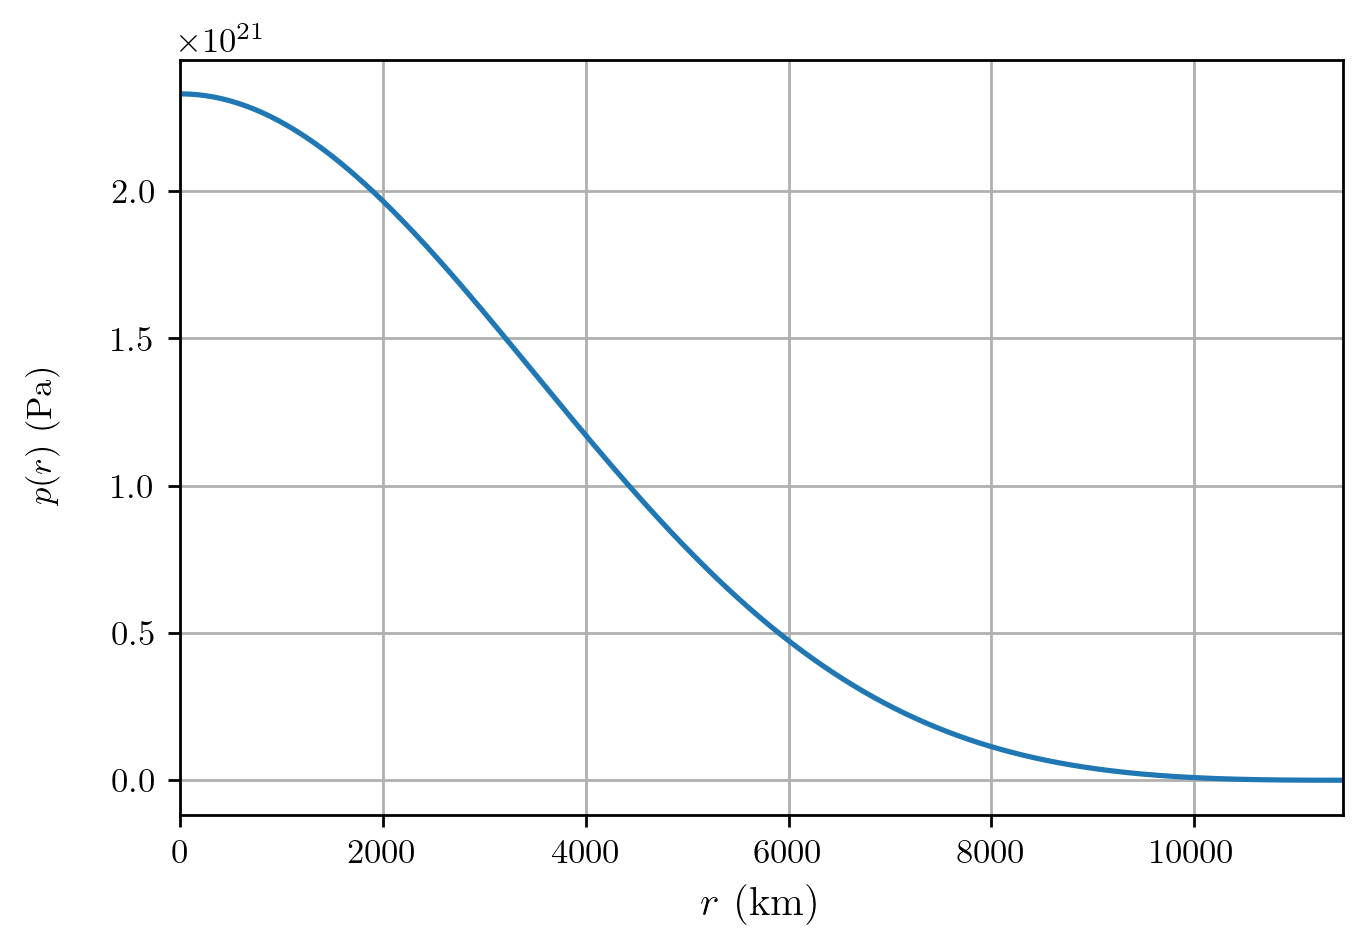

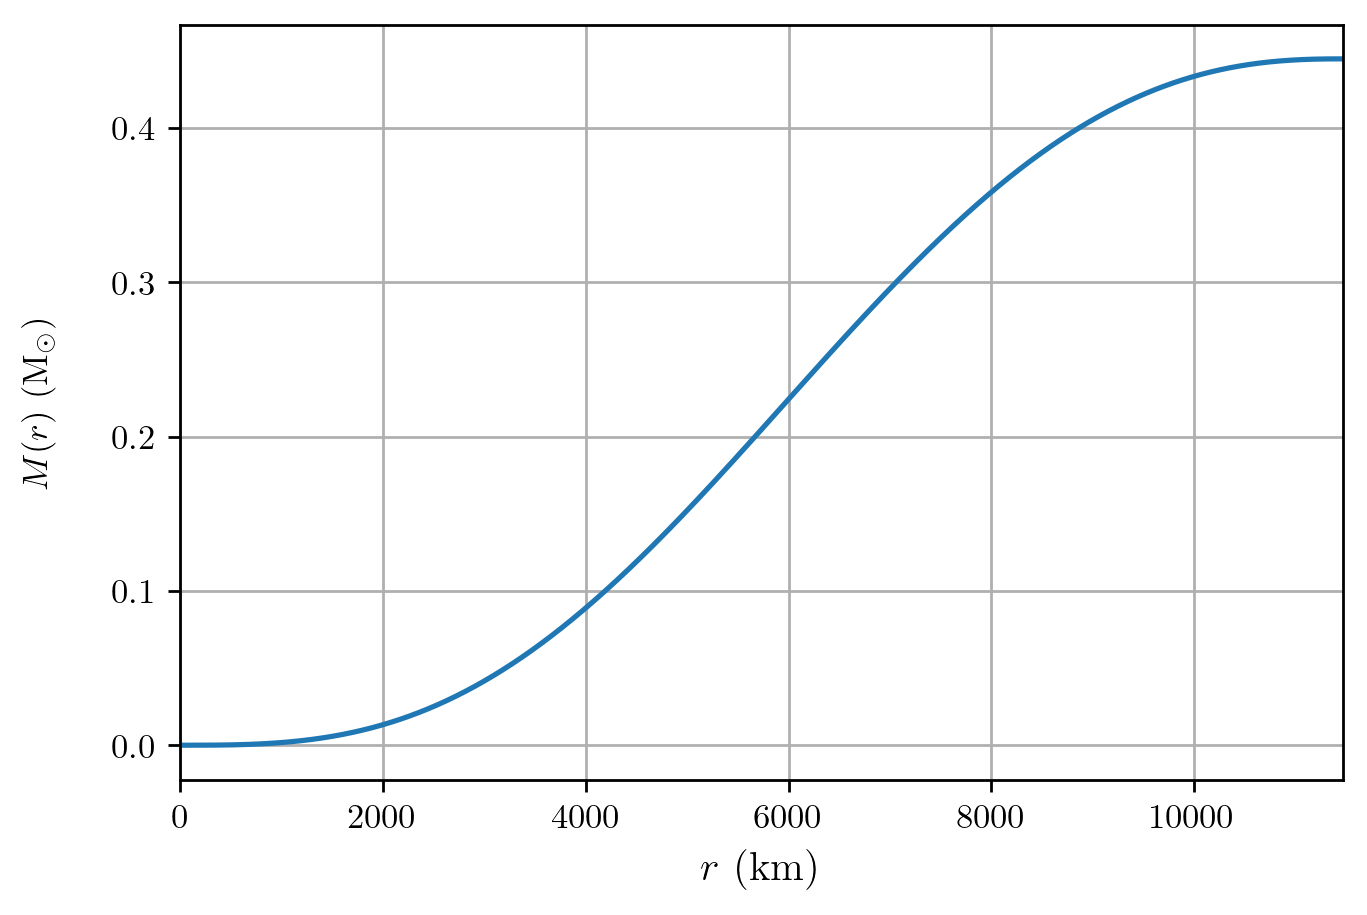

In [12]:
display(Latex("The radius of the star is ${0:5.3f}$ $ \\mathrm{{km}}$.".format(r_values[-1]/1000)))
display(Latex("The mass of the star is ${0:5.4f}$ $\mathrm{{M}}_{{\\odot}}$.".format(M_bar_values[-1])))

fig1 = plt.figure(dpi = 250)
ax1 = fig1.add_subplot(111)
#ax1.set_ylim(bottom = 0., top = 1.1)
ax1.plot(r_values/1000, p_bar_values)
ax1.set_xlabel("$r$ (km)", fontsize = "large")
ax1.set_ylabel("$p(r)$ ($\\mathrm{{Pa}}$)", labelpad = 15)
ax1.margins(x = 0)
ax1.grid()

fig2 = plt.figure(dpi = 250)
ax2 = fig2.add_subplot(111)
#ax2.set_xlim(left = 0., right = 1.01)
#ax2.set_ylim(bottom = 0., top = 1.1)
ax2.plot(r_values/1000, M_bar_values)
ax2.set_xlabel("$r$ (km)", fontsize = "large")
ax2.set_ylabel("$M(r)$ ($\mathrm{M}_{\odot}$)", labelpad = 15)
ax2.margins(x = 0)
ax2.grid()

plt.show()